<a href="https://colab.research.google.com/github/p72losaj/Introduccion_Modelos_Computacionales/blob/main/Practica4_IMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PORTADA

1.   Título de la práctica: Práctica 4: Máquinas de Vectores Soporte.
2.   Asignatura: Introducción a los Modelos Computacionales.
3. Titulación: Grado de Ingeniería Informática, especialidad de computación.
4. Escuela: Escuela Politécnica Superior de Córdoba.
5. Universidad: Universidad de Córdoba.
6. Curso Académico: 2022-2023.
7. Nombre: Jaime Lorenzo Sánchez.
8. DNI: 31872814-N.
9. Correo electrónico: p72losaj@uco.es

# Representación 2D de las SVM

Para realizar la representación gráfica en 2 dimensiones, utilizaremos el siguiente scrip. Para ello, primero debemos cargar el dataset1.csv

In [1]:
# Cargamos el primer dataset
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv


A continuación, realizamos un análisis del script.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

def ejercicio1_3(c):
  # Load the dataset
  data = pd.read_csv('dataset1.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=c)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  # Show the separating hyperplane
  plt.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
  plt.show()

def ejercicio1_2():
  # Load the dataset
  data = pd.read_csv('dataset1.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=100)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  plt.show()

def ejercicio1():
  # Load the dataset
  data = pd.read_csv('dataset1.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=100)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  # Show the separating hyperplane
  plt.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

  plt.show()

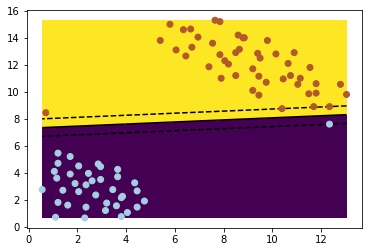

In [4]:
ejercicio1()

Como podemos observar, el script utilizará el conjunto de datos dataset1.csv, realizando una primera lectura del dataset y dividiendo dicho dataset en entradas (X) y salidas (y).
A continuación, utiliza el método de clasificación SVC (máquinas de vectores de soporte) para realizar el entrenamiento de los datos de dataset.
Para ello, utiliza un método kernel lineal y el parámetro C con un valor de 100.
El resto del código realiza las operaciones necesarias para generar la gráfica, en la cuál se muestra el hiperplano separador, así como los vectores soportes pertenecientes a las clases positiva y negativa.

# Primer dataset de ejemplo

Vamos a volver a ejecutar el script, pero obviando las líneas correspondientes a la representación gráfica SVM, de modo que sólo se mostrarán los puntos del dataset.

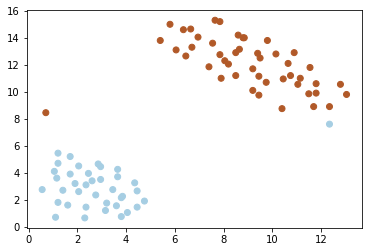

In [6]:
ejercicio1_2()

Sólo observando los puntos, podemos saber de forma intuitiva que el hiperplano separador más útil para separar las 2 clases es el lineal, pues una recta es suficiente para separar ambas clases.

Si volvemos al script original y utilizamos distintos valores de C, podemos analizar la utilidad de este parámetro. Cuando C tiene un valor bajo, el margen del SVM aumenta, por lo que puede dar lugar a errores.

Parametro C:  0.01


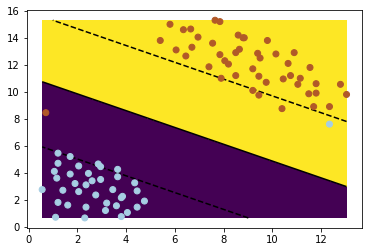

Parametro C:  0.01


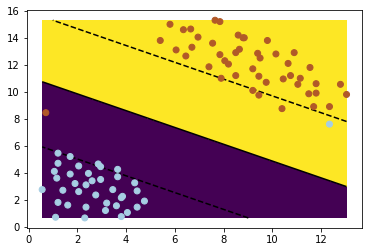

Parametro C:  1


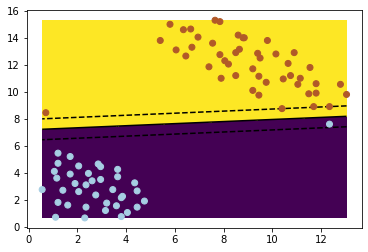

Parametro C:  10


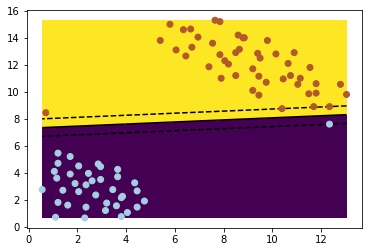

Parametro C:  100


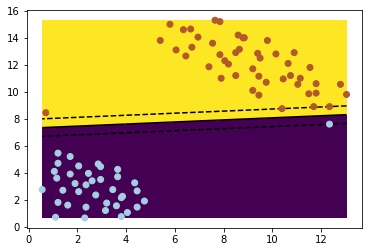

Parametro C:  1000


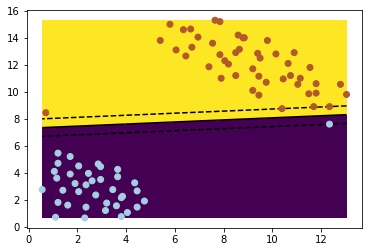

Parametro C:  10000


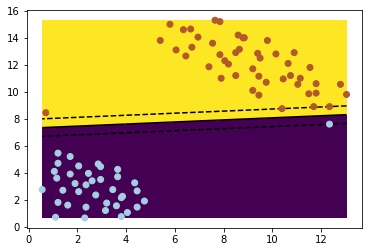

In [19]:
C_range = [0.01, 0.01, 1, 10, 100, 1000, 10000]
for i in C_range :
  print('Parametro C: ', i)
  ejercicio1_3(i)


Por otro lado, un valor alto produce un margen más pequeño, y por tanto el SVM es más restrictivo. Es importante dar con el valor correcto del margen para que se clasifiquen todos los patrones correctamente y no se produzca sobre-entrenamiento.



En el caso de esta base de datos, no es hasta que el valor de C es igual a 10 que todos los patrones se clasifican correctamente. Un valor de C=100 produce un margen más restrictivo, y valores más altos no producen más cambios relevantes. Es por ello que el valor de 100 parece ser el que produce resultados más satisfactorios.



# Segundo dataset de ejemplo

In [20]:
# Cargamos el segundo dataset de ejemplo
from google.colab import files
uploaded = files.upload()

Saving dataset2.csv to dataset2.csv


A continuación, creamos el script que utilizaremos para el segundo dataset de ejemplo

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

def ejercicio2_2(c,g):
  # Load the dataset
  data = pd.read_csv('dataset2.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='rbf',C=c,gamma=g)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  # Show the separating hyperplane
  plt.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
  plt.show()

def ejercicio2(c):
  # Load the dataset
  data = pd.read_csv('dataset2.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=c)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  # Show the separating hyperplane
  plt.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
  plt.show()

Parametro C:  0.01


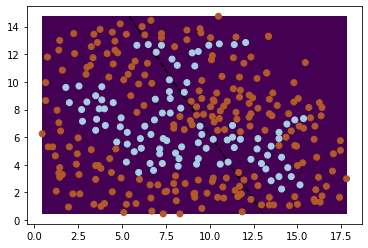

Parametro C:  0.01


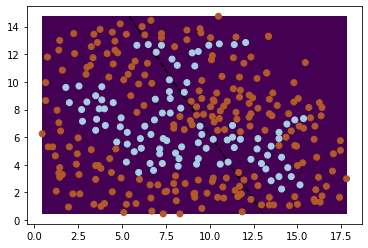

Parametro C:  1


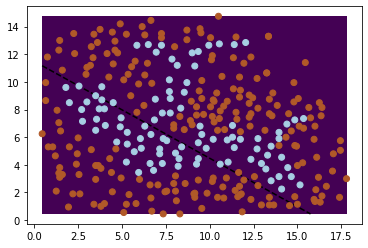

Parametro C:  10


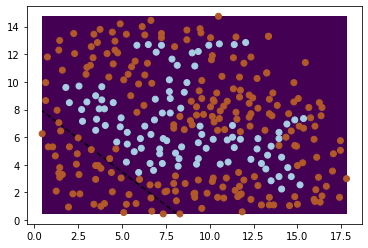

Parametro C:  100


<ipython-input-21-daac36f0b561>:33: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],


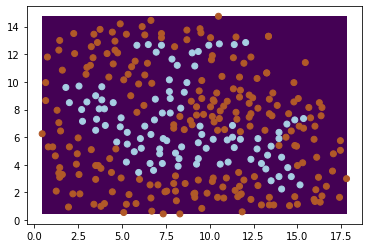

Parametro C:  1000


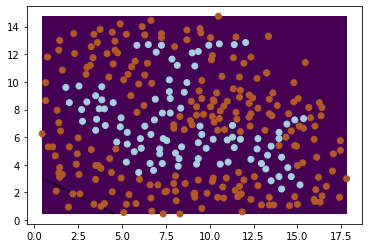

Parametro C:  10000


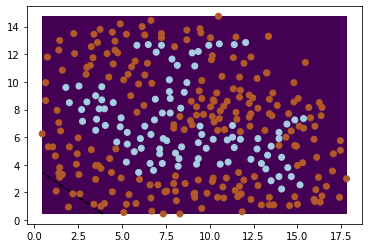

In [22]:
C_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for i in C_range :
  print('Parametro C: ', i)
  ejercicio2(i)

Está claro que el modelo no es capaz de clasificar correctamente. Si modificamos los valores de C vemos que el resultado es igual de desastroso. Esto se debe a que el problema se encuentra en el tipo de kernel que utilizamos. Este dataset no se puede separar de forma lineal, por lo que un hiperplano separador lineal no es capaz de resolver este problema.



A continuación, proponemos una configuración SVM no lineal, aplicando el kernel tipo RBF

C:  100 ; g:  0.02


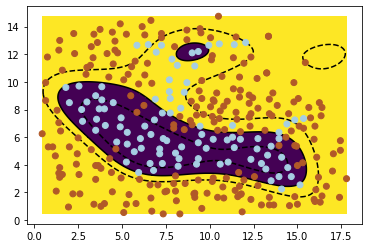

C:  100 ; g:  0.2


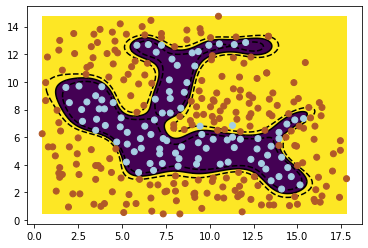

C:  100 ; g:  2.0


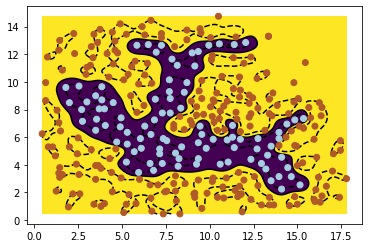

C:  100 ; g:  20.0


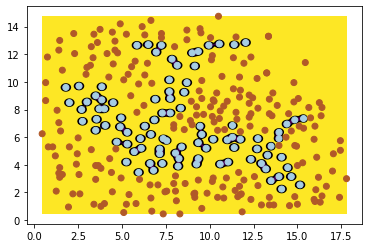

C:  100 ; g:  200.0


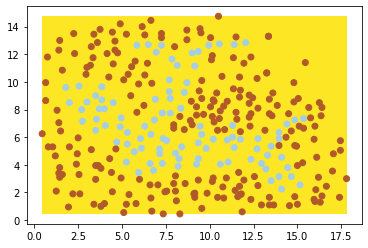

In [28]:
g_range = [2e-2, 2e-1,2e0,2e1,2e2]
for i in g_range:
  print('C: ', 100, "; g: ", i)
  ejercicio2_2(100,i)

Como podemos ver, un valor bajo de gamma, como los dos primeros, produce un infra-entrenamiento, mientras que un valor alto, como son los dos últimos, produce sobre-entrenamiento. Todo esto en relación al valor de C que teníamos anteriormente.

A continuación, realizamos distintas combinaciones de C y gamma:

Parametro C:  0.01 ; g:  0.02


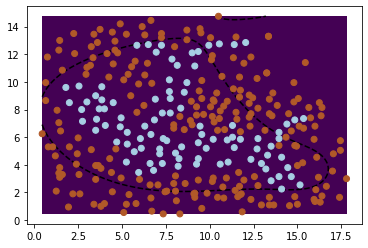

Parametro C:  0.01 ; g:  0.2


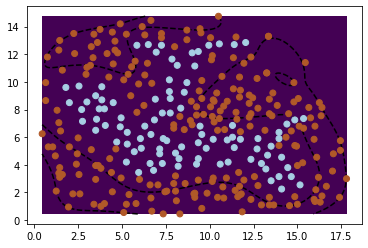

Parametro C:  0.01 ; g:  2.0


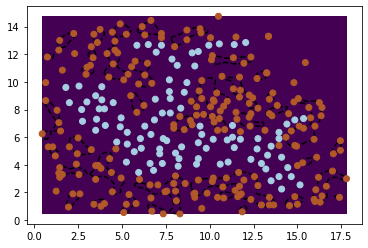

Parametro C:  0.01 ; g:  20.0


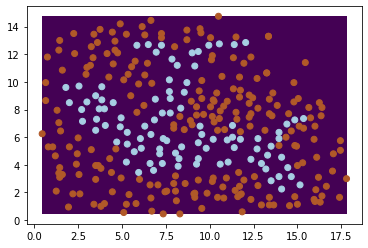

Parametro C:  0.01 ; g:  200.0


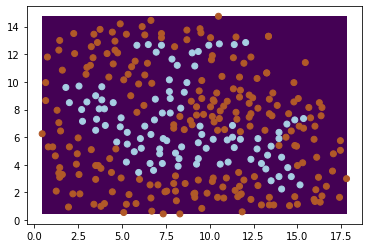

Parametro C:  0.1 ; g:  0.02


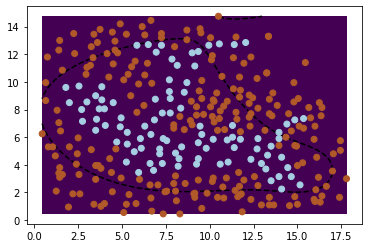

Parametro C:  0.1 ; g:  0.2


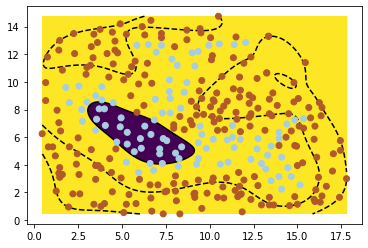

Parametro C:  0.1 ; g:  2.0


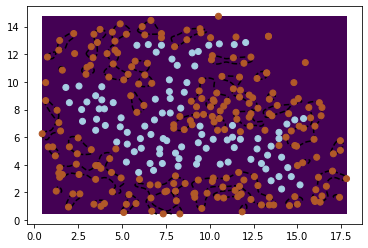

Parametro C:  0.1 ; g:  20.0


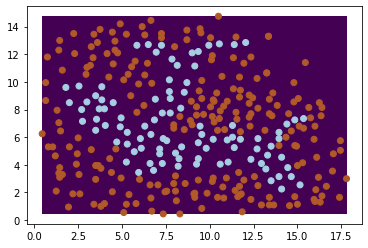

Parametro C:  0.1 ; g:  200.0


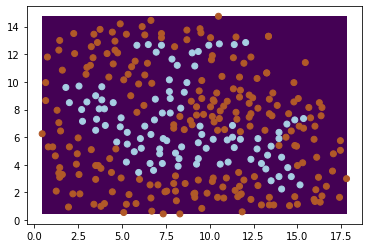

Parametro C:  1 ; g:  0.02


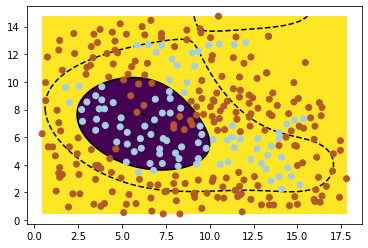

Parametro C:  1 ; g:  0.2


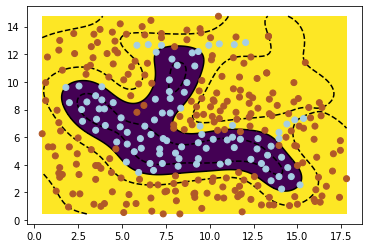

Parametro C:  1 ; g:  2.0


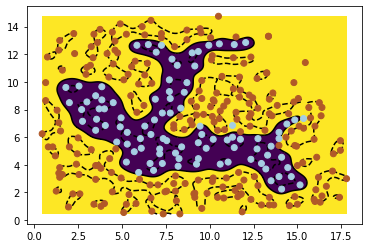

Parametro C:  1 ; g:  20.0


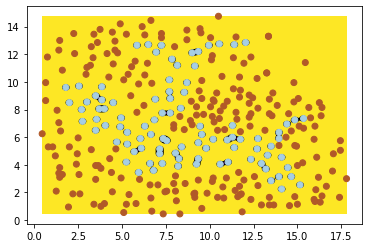

Parametro C:  1 ; g:  200.0


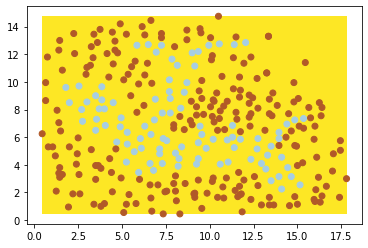

Parametro C:  10 ; g:  0.02


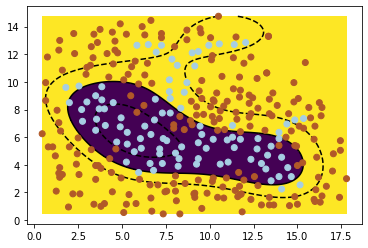

Parametro C:  10 ; g:  0.2


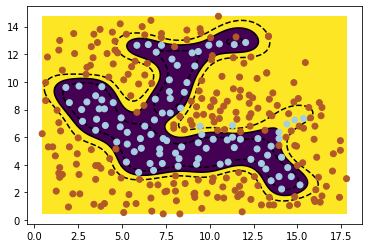

Parametro C:  10 ; g:  2.0


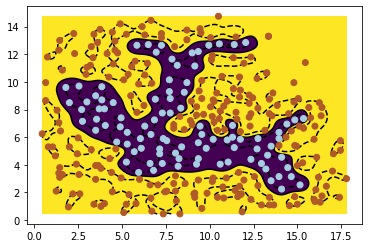

Parametro C:  10 ; g:  20.0


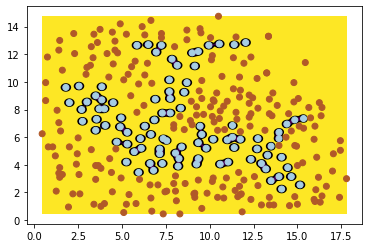

Parametro C:  10 ; g:  200.0


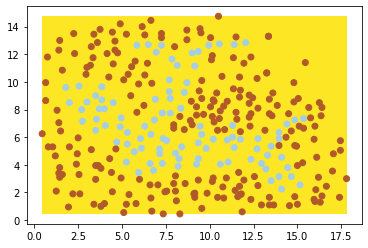

Parametro C:  100 ; g:  0.02


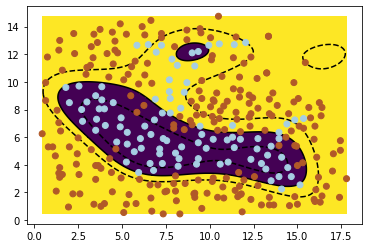

Parametro C:  100 ; g:  0.2


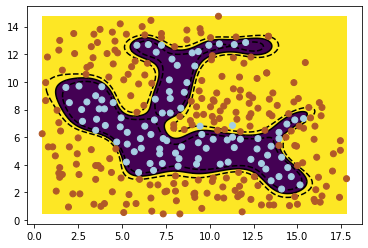

Parametro C:  100 ; g:  2.0


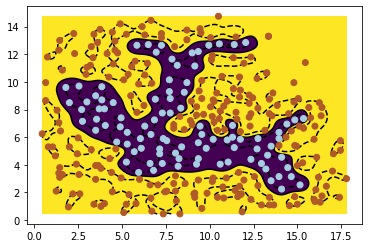

Parametro C:  100 ; g:  20.0


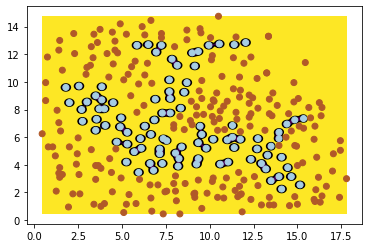

Parametro C:  100 ; g:  200.0


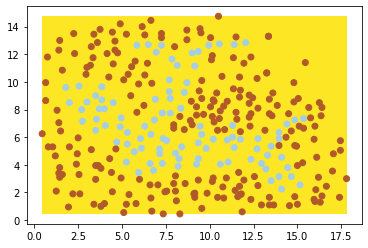

Parametro C:  1000 ; g:  0.02


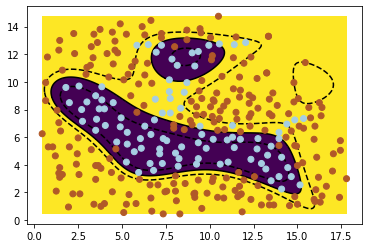

Parametro C:  1000 ; g:  0.2


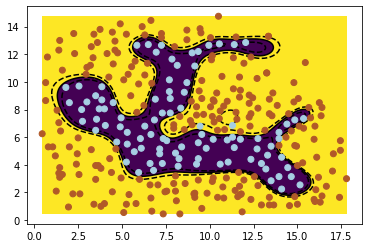

Parametro C:  1000 ; g:  2.0


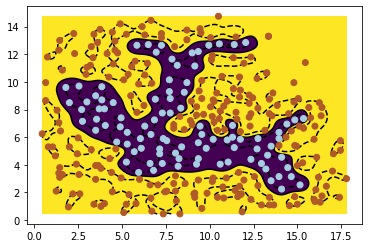

Parametro C:  1000 ; g:  20.0


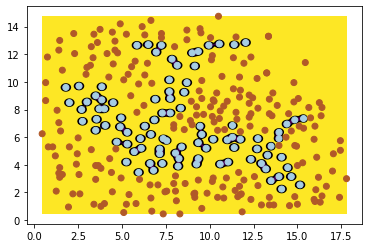

Parametro C:  1000 ; g:  200.0


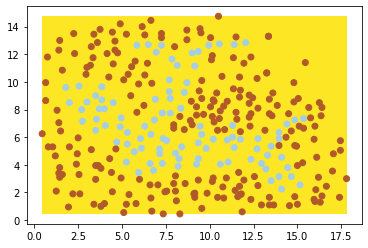

Parametro C:  10000 ; g:  0.02


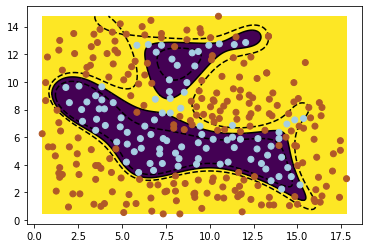

Parametro C:  10000 ; g:  0.2


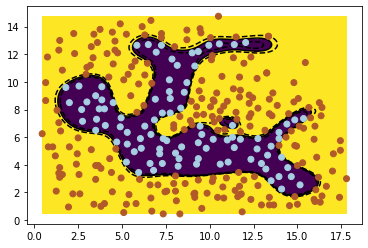

Parametro C:  10000 ; g:  2.0


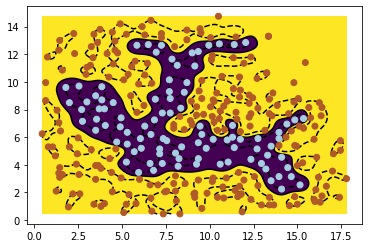

Parametro C:  10000 ; g:  20.0


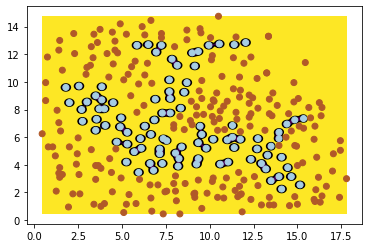

Parametro C:  10000 ; g:  200.0


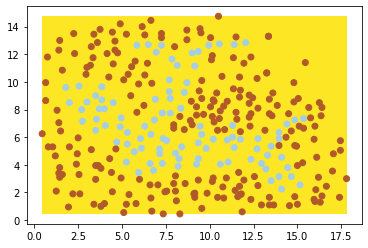

In [27]:
C_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
g_range = [2e-2, 2e-1,2e0,2e1,2e2]
for i in C_range :
  for j in g_range :
    print('Parametro C: ', i, "; g: ", j)
    ejercicio2_2(i,j)

Tras las pruebas anteriores, hemos obtenido resultados satisfactorios utilizando los valores C=10000, gamma=0.2

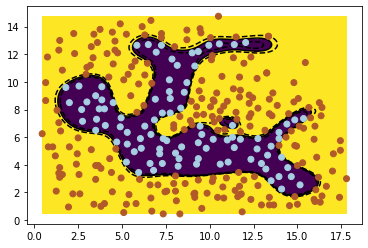

In [29]:
ejercicio2_2(1e4,2e-1)

# Tercer dataset de ejemplo

Vamos a comprobar si el dataset3 es linealmente separable o no. Para ello, primero debemos cargar dicho dataset:

In [30]:
# Cargamos el tercer dataset de ejemplo
from google.colab import files
uploaded = files.upload()

Saving dataset3.csv to dataset3.csv


A continuación, modificamos el script para analizar el dataset3.csv

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

def ejercicio3():
  # Load the dataset
  data = pd.read_csv('dataset3.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=100)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  plt.show()

def ejercicio3_2(c,g):
  # Load the dataset
  data = pd.read_csv('dataset3.csv',header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  # Train the SVM model
  svm_model = svm.SVC(kernel='rbf',C=c,gamma=g)
  svm_model.fit(X, y)
  # Show the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  # Show the separating hyperplane
  plt.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
  plt.show()

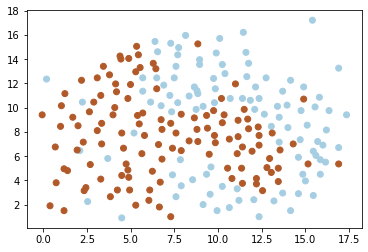

In [32]:
ejercicio3()

Este dataset tampoco puede separarse correctamente utilizando un kernel lineal. Observando los puntos se pueden encontrar un par de outliers, ya que se posicionan en la zona de una clase pero se clasifican como la otra.

Por tanto, vamos a lanzar un SVM no lineal para clasificar los datos

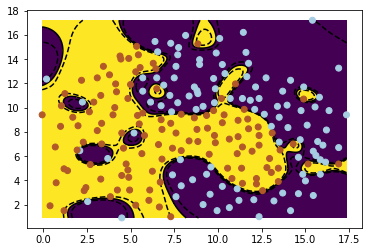

In [74]:
ejercicio3_2(1e4,2e-1)

Estos valores ofrecen unos resultados bastante óptimos, por lo que no es necesario hacer el modelo más restrictivo. 

Vamos a realizar un ejemplo de infra-entrenamiento y sobre-entrenamiento

Configutacion infra-entrenamiento:


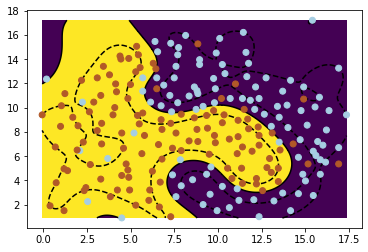

Configuracion sobre_entrenamiento: 


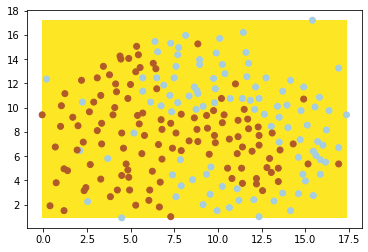

In [63]:
print('Configutacion infra-entrenamiento:')
ejercicio3_2(1,2e-1)
print('Configuracion sobre_entrenamiento: ')
ejercicio3_2(10,2e2)

# Interfaz de consola

Vamos a reproducir a continuación el proceso que se realiza a través de la interfaz de consola de libsvm. Esto es, estandarizar el fichero de la base de datos, entrenar el modelo y realizar una predicción en base a una parte de test obtenida de los propios datos. Todo ello usando el tercer dataset.

Primero vamos realizar la estandarización haciendo uso del objeto StandardScaler.

In [148]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold

def interfazConsola3():
  Cs = np.logspace(-2, 4, num=7, base=10)
  Gs = np.logspace(-2, 2, num=5, base=2)
  skf = StratifiedKFold(n_splits=5)
  results=np.zeros((len(Cs)*len(Gs),7))
  # Load the dataset
  data = pd.read_csv("dataset3.csv",header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  i=2
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    j=0
    
    for c in Cs:
        for g in Gs:
            train = svm.SVC(kernel='rbf', C=c, gamma=g).fit(X_train, y_train)
            
            if i == 2:
                results[j,0]=c
                results[j,1]=g
            
            results[j,i]=train.score(X_test, y_test)
            j = j+1
    i= i+1
  maxJ=0
  maxMean=np.mean(results[0,2:7])
  # Escogemos la mejor combinacion de parametros
  for x in range(1, (len(Cs)*len(Gs))):
    mean = np.mean(results[x,2:7])
    if mean > maxMean:
        maxMean = mean
        maxJ = x
  # Utilizamos los parámetros escogidos para realizar el entrenamiento y el test.
  optimo = svm.SVC(kernel='rbf', C=results[maxJ,0], gamma=results[maxJ,1])
  x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
  optimo.fit(x_train, y_train)
  print(optimo.score(x_test, y_test))


def interfazConsola2():
  scaler = preprocessing.StandardScaler()
  # Load the dataset
  data = pd.read_csv("dataset3.csv",header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  X_train = scaler.fit_transform(X,y)
  Cs = np.logspace(-2, 4, num=7, base=10)
  Gs = np.logspace(-2, 2, num=5, base=2)
  # Entrenamiento estratificado con 75% de entrenamiento y 25% de test.
  x_train, x_test, y_train, y_test = train_test_split(X_train, y, stratify=y, test_size=0.25)
  # Realizamos la predicción de test, aplicando los parámetros C y gamma obtenidos anteriormente
  svm_model = svm.SVC(kernel='rbf',C=10000, gamma=0.2)
  svm_model.fit(x_train, y_train)
  optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=5)
  optimo.fit(x_train, y_train)
  print(optimo.score(x_test, y_test))



def interfazConsola():
  scaler = preprocessing.StandardScaler()
  # Load the dataset
  data = pd.read_csv("dataset3.csv",header=None)
  X = data.iloc[:,:-1].values
  y = data.iloc[:,-1].values
  X_train = scaler.fit_transform(X,y)
  # Entrenamiento estratificado con 75% de entrenamiento y 25% de test.
  x_train, x_test, y_train, y_test = train_test_split(X_train, y, stratify=y, test_size=0.25)
  # Realizamos la predicción de test, aplicando los parámetros C y gamma obtenidos anteriormente
  svm_model = svm.SVC(kernel='rbf',C=10000, gamma=0.2)
  svm_model.fit(x_train, y_train)
  print(svm_model.score(x_test,y_test))
  # Plot the points
  plt.figure(1)
  plt.clf()
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
  # Plot the support vectors class regions, the separating hyperplane and the margins
  plt.axis('tight')
  # |->Plot support vectors
  plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], 
            marker='+', s=100, zorder=10, cmap=plt.cm.Paired)
  # |-> Extract the limits
  x_min = X_train[:, 0].min()
  x_max = X_train[:, 0].max()
  y_min = X_train[:, 1].min()
  y_max = X_train[:, 1].max()
  # |-> Create a grid with all the points and then obtain the SVM 
  #    score for all the points
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # |-> Plot the results in a countour
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])

  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.show()


Para realizar un correcto estudio de este proceso, realizaremos la ejecución un número de 5 veces y comprobamos los resultados

0.8571428571428571


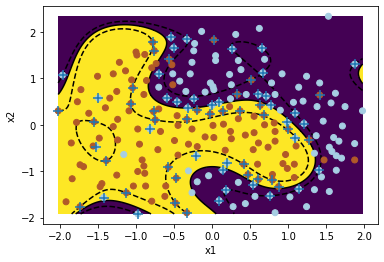

0.9107142857142857


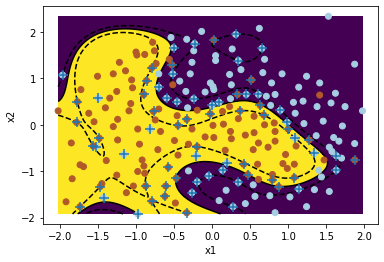

0.8392857142857143


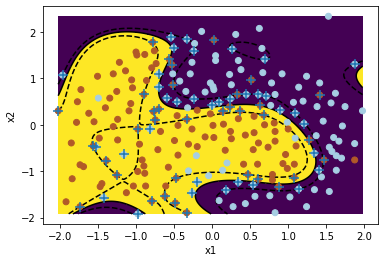

0.7678571428571429


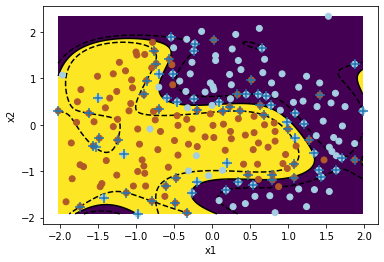

0.8571428571428571


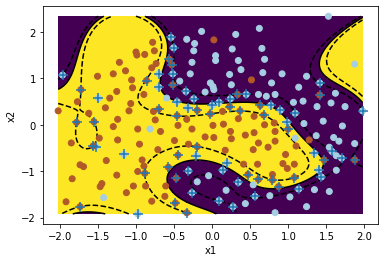

In [84]:
for i in range (1,6):
  interfazConsola()

Podemos comprobar que los resultados obtenidos varían en función de la semilla. Si observamos los resultados, el mejor porcentaje obtenido ha sido 91%, por lo que el modelo predice bien.

Realizamos el entrenamiento anterior utilizando el objeto GridSearchCV, con lo que podemos hacer un proceso de validación cruzada anidada tipo K-Fold y encontrar los mejores valores de C y gamma.

In [125]:
interfazConsola2()

0.8214285714285714


Parece ser que los resultados son igual de buenos que antes, por lo que se puede entender que los valores escogidos al principio de C y gamma eran los óptimos para este problema.

En cualquier caso, está claro que es más cómodo utilizar validación cruzada para encontrar los mejores valores de distintos parámetros.

Vamos a realizar de forma manual la validación cruzada para entender cómo funciona.

Primero realizamos una partición tipo K-fold de los datos de entrenamiento. Vamos a hacer k=5.

In [130]:
interfazConsola3()

0.8214285714285714


Como vemos, el resultado es el mismo, por lo que hemos simulado correctamente el funcionamiento de GridSearchCV.

# Base de datos reales

In [131]:
# Cargamos el dataset ildp
from google.colab import files
uploaded = files.upload()

Saving test_ildp.csv to test_ildp.csv
Saving train_ildp.csv to train_ildp.csv


Vamos a utilizar el script de validación cruzada en la base de datos ildp. Para ello, vamos a definir una función a la que podamos pasar el valor de K.

In [168]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold

def ejercicio12_2(train_dataset, test_dataset, k, inicio, fin):
    scaler = preprocessing.StandardScaler()
    # Load the dataset
    string = '/content/'+train_dataset+'.csv'
    data_train = pd.read_csv(string,header=None)
    string = '/content/'+test_dataset+'.csv'
    data_test = pd.read_csv(string,header=None)
    x_train = data_train.iloc[:,:-1].values
    y_train = data_train.iloc[:,-1].values
    x_test = data_test.iloc[:,:-1].values
    y_test = data_test.iloc[:,-1].values
    
    Cs = np.logspace(inicio, fin, num=7, base=10)
    Gs = np.logspace(inicio, fin, num=7, base=2)
    
    svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
    svm_model.fit(x_train, y_train)

    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=k)
    optimo.fit(x_train, y_train)

    return optimo.score(x_test, y_test)

def ejercicio12(train_dataset, test_dataset, k, inicio, fin):
    scaler = preprocessing.StandardScaler()
    # Load the dataset
    string = '/content/'+train_dataset+'.csv'
    data_train = pd.read_csv(string,header=None)
    string = '/content/'+test_dataset+'.csv'
    data_test = pd.read_csv(string,header=None)
    x_train = data_train.iloc[:,:-1].values
    y_train = data_train.iloc[:,-1].values
    x_test = data_test.iloc[:,:-1].values
    y_test = data_test.iloc[:,-1].values
    
    Cs = np.logspace(inicio, fin, num=7, base=10)
    Gs = np.logspace(inicio, fin, num=7, base=2)
    
    svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
    svm_model.fit(x_train, y_train)

    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=k)
    optimo.fit(x_train, y_train)

    print(optimo.score(x_test, y_test))




In [163]:
ejercicio12('train_ildp', 'test_ildp', 5,-3,3)

0.6954022988505747


Hemos obtenido un resultado del 70%, por lo que el modelo lo podemos considerar algo bueno.

Si lo comparamos con la práctica anterior, siendo superior a la inicialización inicial de la práctica anterior (66,32) y a la inicialización kmeans (64,71).

Si observamos el script implementado, vemos que el valor K se especifica en el parámetro cv de la función GridSearchCV; así como los parámetros C y gamma en el parámetro param_grid de la función GridSearchCV.

Probamos a utilizar distintos parámetros de K y comparamos los tiempos computaciones y los resultados en test.

In [169]:
import time
k = [3,5,10]
print('k;CCR;time(s)')
for i in k:
  start = time.time()
  CCR=ejercicio12_2('train_ildp', 'test_ildp', i,-3,3)
  end = time.time()
  print(i,';',CCR,';',(end-start))


k;CCR;time(s)
3 ; 0.7068965517241379 ; 3.0401177406311035
5 ; 0.6954022988505747 ; 2.282777786254883
10 ; 0.6954022988505747 ; 5.083986520767212


Si observamos la tabla anterior, podemos comparar los tiempos como el CCR en test del algoritmo usando distintos valores de K.

A continuación, diseñamos un script para calcular el rendimiento del modelo para cada clase y por grupos

In [ ]:
!pip install fairlearn



In [223]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import false_negative_rate
from fairlearn.metrics import false_positive_rate
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix
def RendimientoModelo(train_dataset, test_dataset, k, inicio, fin):
    scaler = preprocessing.StandardScaler()
    # Load the dataset
    string = '/content/'+train_dataset+'.csv'
    data_train = pd.read_csv(string,header=None)
    string = '/content/'+test_dataset+'.csv'
    data_test = pd.read_csv(string,header=None)
    # Obtenemos los train inputs y train outputs del dataset
    x_train = data_train.iloc[:,:-1].values
    y_train = data_train.iloc[:,-1].values
    # Obtenemos los test inputs y test outputs del dataset
    x_test = data_test.iloc[:,:-1].values
    y_test = data_test.iloc[:,-1].values
    
    Cs = np.logspace(inicio, fin, num=7, base=10)
    Gs = np.logspace(inicio, fin, num=7, base=2)
    
    svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
    svm_model.fit(x_train, y_train)

    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=k)
    optimo.fit(x_train, y_train)
    print("Etiqueta minoritaria del dataset: ", Counter(y_train).most_common()[-1][0])
    # Fairlearn metrics
    lu = np.unique(x_train[:,-1])
    train_gender_bin = np.zeros(data_train.iloc[:,-1].shape)
    train_gender_bin[ x_train[:,-1] == lu[1]] = 1
    test_gender_bin = np.zeros(data_test.iloc[:,-1].shape)
    test_gender_bin[ x_test[:,-1] == lu[1]] = 1
    print("Etiqueta minoritaria del fairlearn: ", Counter(train_gender_bin).most_common()[-1][0])
    metrics = {
      'false negative rate': false_negative_rate,
      'false positive rate': false_positive_rate,
    }
    
    # MetricFrame de test
    test_fm = MetricFrame(
        metrics = metrics,
        y_true = y_test,
        y_pred = optimo.predict(x_test),
        sensitive_features=test_gender_bin
    )
    
    print('Overall test FM: ')
    print(test_fm.overall)
    print('Group test FM:')
    print(test_fm.by_group)
    print('Accuracy: ', optimo.score(x_test, y_test))
    

In [224]:
RendimientoModelo('train_ildp', 'test_ildp', 3,-3,3)

Etiqueta minoritaria del dataset:  0.0
Etiqueta minoritaria del fairlearn:  1.0
Overall test FM: 
false negative rate    0.032520
false positive rate    0.921569
dtype: float64
Group test FM:
                     false negative rate  false positive rate
sensitive_feature_0                                          
0.0                             0.021053             0.885714
1.0                             0.071429             1.000000
Accuracy:  0.7068965517241379
